In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df= pd.read_csv(r'auto-mpg.data',header=None)


In [4]:
df

,0
0,18.0 8 307.0 130.0 3504. 12...
1,15.0 8 350.0 165.0 3693. 11...
2,18.0 8 318.0 150.0 3436. 11...
3,16.0 8 304.0 150.0 3433. 12...
4,17.0 8 302.0 140.0 3449. 10...
...,...
393,27.0 4 140.0 86.00 2790. 15...
394,44.0 4 97.00 52.00 2130. 24...
395,32.0 4 135.0 84.00 2295. 11...
396,28.0 4 120.0 79.00 2625. 18...


In [13]:
original= pd.read_csv(r'auto-mpg.data-original')
dataset = pd.read_csv('auto-mpg.csv')

In [14]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [15]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year'],
      dtype='object')

In [16]:
#dataset.split('')

In [17]:
#dataset['mpg'],dataset['cylinders'],dataset['displacement'],dataset['horsepower'],dataset['weight'],dataset['acceleration'],dataset['model year'],dataset['origin'],dataset['Car name']=dataset['a'].str.split('  ',8).str

In [18]:
dataset.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70


In [45]:
dataset.columns=['a']

In [46]:
dataset['a']

0      18.0   8   307.0      130.0      3504.      12...
1      15.0   8   350.0      165.0      3693.      11...
2      18.0   8   318.0      150.0      3436.      11...
3      16.0   8   304.0      150.0      3433.      12...
4      17.0   8   302.0      140.0      3449.      10...
                             ...                        
393    27.0   4   140.0      86.00      2790.      15...
394    44.0   4   97.00      52.00      2130.      24...
395    32.0   4   135.0      84.00      2295.      11...
396    28.0   4   120.0      79.00      2625.      18...
397    31.0   4   119.0      82.00      2720.      19...
Name: a, Length: 398, dtype: object

In [ ]:
df['fruit'] = df.text.str.split(' ').str[0]
df['count'] = df.text.str.split(' ').str[1]

In [72]:
df.columns=['a']

In [73]:
df

,a
0,18.0 8 307.0 130.0 3504. 12...
1,15.0 8 350.0 165.0 3693. 11...
2,18.0 8 318.0 150.0 3436. 11...
3,16.0 8 304.0 150.0 3433. 12...
4,17.0 8 302.0 140.0 3449. 10...
...,...
393,27.0 4 140.0 86.00 2790. 15...
394,44.0 4 97.00 52.00 2130. 24...
395,32.0 4 135.0 84.00 2295. 11...
396,28.0 4 120.0 79.00 2625. 18...


In [80]:
df['mpg']=df['a'].str.split(' ').str[0]

In [88]:
df['cylinders']=df['a'].str.split('  ').str[1]

In [94]:
df['displacement']=df['a'].str.split('  ').str[2]

In [120]:
df['horsepower']=df['a'].str.split(' ').str[12]

In [123]:
df['weight']=df['a'].str.split('  ').str[8]

In [126]:
df['acceleration']=df['a'].str.split('   ').str[8]

In [128]:
df['model year']=df['a'].str.split('   ').str[9]

In [139]:
df['a'].str.split('       ')

0      [18.0   8   307.0      130.0      3504.      1...
1      [15.0   8   350.0      165.0      3693.      1...
2      [18.0   8   318.0      150.0      3436.      1...
3      [16.0   8   304.0      150.0      3433.      1...
4      [17.0   8   302.0      140.0      3449.      1...
                             ...                        
393    [27.0   4   140.0      86.00      2790.      1...
394    [44.0   4   97.00      52.00      2130.      2...
395    [32.0   4   135.0      84.00      2295.      1...
396    [28.0   4   120.0      79.00      2625.      1...
397    [31.0   4   119.0      82.00      2720.      1...
Name: a, Length: 398, dtype: object

In [158]:
df['model year'].str.split('  ')

0      [70, 1\t"chevrolet chevelle malibu"]
1              [70, 1\t"buick skylark 320"]
2             [70, 1\t"plymouth satellite"]
3                  [70, 1\t"amc rebel sst"]
4                    [70, 1\t"ford torino"]
                       ...                 
393              [82, 1\t"ford mustang gl"]
394                    [82, 2\t"vw pickup"]
395                [82, 1\t"dodge rampage"]
396                  [82, 1\t"ford ranger"]
397                   [82, 1\t"chevy s-10"]
Name: model year, Length: 398, dtype: object

In [160]:
df['model year'].str.split(' ')

0      [70, , 1\t"chevrolet, chevelle, malibu"]
1              [70, , 1\t"buick, skylark, 320"]
2              [70, , 1\t"plymouth, satellite"]
3                  [70, , 1\t"amc, rebel, sst"]
4                     [70, , 1\t"ford, torino"]
                         ...                   
393              [82, , 1\t"ford, mustang, gl"]
394                     [82, , 2\t"vw, pickup"]
395                 [82, , 1\t"dodge, rampage"]
396                   [82, , 1\t"ford, ranger"]
397                    [82, , 1\t"chevy, s-10"]
Name: model year, Length: 398, dtype: object

In [165]:
bb=df['model year'].str.split(' ').str[3]

In [167]:
cc=df['model year'].str.split(' ').str[4]

In [184]:
dd=df['model year'].str.split(' ').str[4]

In [189]:
cc=dd.str.split('"').str[0]

In [190]:
cc=cc.fillna('')

In [147]:
text=df['model year'].str.split(' ').str[2]

In [156]:
text

0      1\t"chevrolet
1          1\t"buick
2       1\t"plymouth
3            1\t"amc
4           1\t"ford
           ...      
393         1\t"ford
394           2\t"vw
395        1\t"dodge
396         1\t"ford
397        1\t"chevy
Name: model year, Length: 398, dtype: object

In [164]:
aa=text.str.split('"').str[1]

In [171]:
aa

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: model year, Length: 398, dtype: object

In [195]:
bb=bb.str.split('"').str[0]

In [196]:
aa+' '+bb+' '+cc

0      chevrolet chevelle malibu
1              buick skylark 320
2            plymouth satellite 
3                  amc rebel sst
4                   ford torino 
                 ...            
393              ford mustang gl
394                   vw pickup 
395               dodge rampage 
396                 ford ranger 
397                  chevy s-10 
Name: model year, Length: 398, dtype: object

In [143]:
df['model year2']=df['model year'].str.split(' ').str[0]

In [150]:
df['origin']=text.str.split('').str[1]

In [197]:
df['Car name']=aa+' '+bb+' '+cc

In [198]:
df

,a,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,model year2,origin,Car name
0,18.0 8 307.0 130.0 3504. 12...,18.0,8,307.0,130.0,3504.,12.0,"70 1\t""chevrolet chevelle malibu""",70,1,chevrolet chevelle malibu
1,15.0 8 350.0 165.0 3693. 11...,15.0,8,350.0,165.0,3693.,11.5,"70 1\t""buick skylark 320""",70,1,buick skylark 320
2,18.0 8 318.0 150.0 3436. 11...,18.0,8,318.0,150.0,3436.,11.0,"70 1\t""plymouth satellite""",70,1,plymouth satellite
3,16.0 8 304.0 150.0 3433. 12...,16.0,8,304.0,150.0,3433.,12.0,"70 1\t""amc rebel sst""",70,1,amc rebel sst
4,17.0 8 302.0 140.0 3449. 10...,17.0,8,302.0,140.0,3449.,10.5,"70 1\t""ford torino""",70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0 4 140.0 86.00 2790. 15...,27.0,4,140.0,86.00,2790.,15.6,"82 1\t""ford mustang gl""",82,1,ford mustang gl
394,44.0 4 97.00 52.00 2130. 24...,44.0,4,97.00,52.00,2130.,24.6,"82 2\t""vw pickup""",82,2,vw pickup
395,32.0 4 135.0 84.00 2295. 11...,32.0,4,135.0,84.00,2295.,11.6,"82 1\t""dodge rampage""",82,1,dodge rampage
396,28.0 4 120.0 79.00 2625. 18...,28.0,4,120.0,79.00,2625.,18.6,"82 1\t""ford ranger""",82,1,ford ranger


In [202]:
df=df.drop(['a','model year'],axis='columns')

In [204]:
df.describe(include='O')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year2,origin,Car name
count,398,398,398,398,398,398,398,392,390
unique,129,6,83,94,346,99,19,3,289
top,13.0,4,97.00,150.0,,14.5,73,1,amc matador
freq,20,204,21,22,7,23,40,245,5


In [210]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year2,origin,Car name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite


In [211]:
dataset=df

In [212]:
dataset.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year2,origin,Car name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite


In [214]:
dataset['horsepower']=pd.to_numeric(dataset['horsepower'],errors='coerce').fillna(0).astype(int)

In [218]:
dataset['mpg']=pd.to_numeric(dataset['mpg'],errors='coerce').fillna(0).astype(int)

In [219]:
dataset['cylinders']=pd.to_numeric(dataset['cylinders'],errors='coerce').fillna(0).astype(int)

In [220]:
dataset['displacement']=pd.to_numeric(dataset['displacement'],errors='coerce').fillna(0).astype(int)

In [221]:
dataset['weight']=pd.to_numeric(dataset['weight'],errors='coerce').fillna(0).astype(int)

In [222]:
dataset['acceleration']=pd.to_numeric(dataset['acceleration'],errors='coerce').fillna(0).astype(int)

In [223]:
dataset['model year2']=pd.to_numeric(dataset['model year2'],errors='coerce').fillna(0).astype(int)

In [224]:
dataset['origin']=pd.to_numeric(dataset['origin'],errors='coerce').fillna(0).astype(int)

In [226]:
dataset.describe(include='O')

,Car name
count,390
unique,289
top,amc matador
freq,5


In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [20]:
X_en=dataset.iloc[:,8].values

IndexError: single positional indexer is out-of-bounds

In [252]:
X_en = labelencoder.fit_transform(X_en.astype(str))

In [256]:
X= dataset.iloc[:,1:7]
X['Car']=X_en

In [258]:
y=dataset.iloc[:,0].values

In [260]:
full_data=X.copy()
full_data['mpg']=y
full_data.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year2,Car,mpg
0,8,307,130,3504,12,70,48,18
1,8,350,165,3693,11,70,35,15


In [261]:
importances=full_data.drop('mpg',axis=1).apply(lambda x:x.corr(full_data.mpg))
indices=np.argsort(importances)
print(importances[indices])

displacement   -0.790739
weight         -0.757705
cylinders      -0.748610
horsepower     -0.731249
model year2     0.193226
Car             0.266526
acceleration    0.292204
dtype: float64


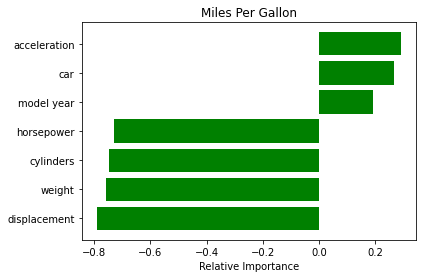

In [262]:
names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'car']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [263]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

cylinders
displacement
horsepower
weight


In [265]:
X=dataset[['cylinders','displacement','horsepower','weight']]

In [266]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

cylinders  is highly  correlated  with  displacement
cylinders  is highly  correlated  with  horsepower
cylinders  is highly  correlated  with  weight
displacement  is highly  correlated  with  cylinders
displacement  is highly  correlated  with  horsepower
displacement  is highly  correlated  with  weight
horsepower  is highly  correlated  with  cylinders
horsepower  is highly  correlated  with  displacement
horsepower  is highly  correlated  with  weight
weight  is highly  correlated  with  cylinders
weight  is highly  correlated  with  displacement
weight  is highly  correlated  with  horsepower


In [267]:
mi = mutual_info_regression(X, y)

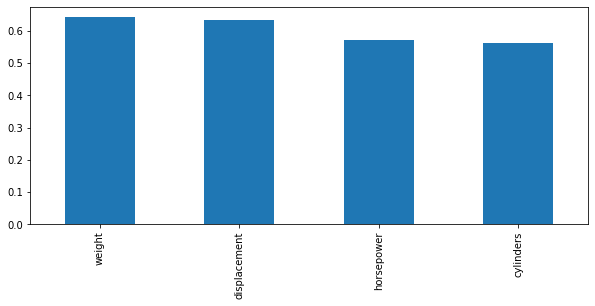

In [268]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))